**Iris Flower Dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = pd.read_csv('iris (1).csv')  # use your uploaded file name

# Encode labels if necessary
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

# Features and Target
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model (you can tune k value)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


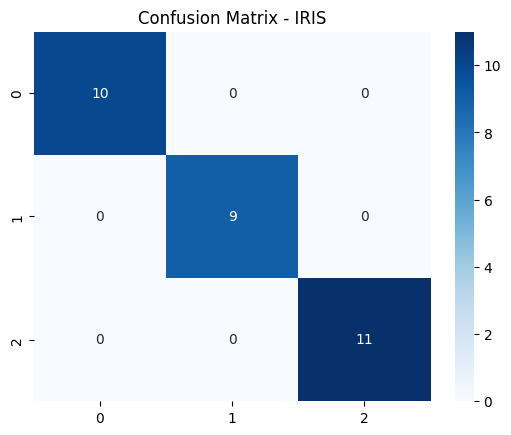


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - IRIS")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

**Diabetes Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')  # use your uploaded file name

# Features and Target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.6883116883116883



Confusion Matrix:
[[79 20]
 [28 27]]


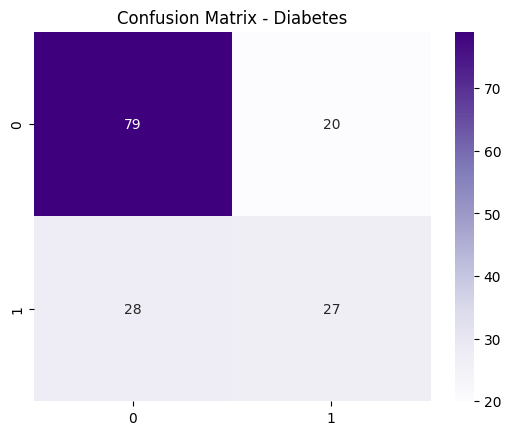

In [ ]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, cmap="Purples", fmt='d')
plt.title("Confusion Matrix - Diabetes")
plt.show()

**Heart Dataset**

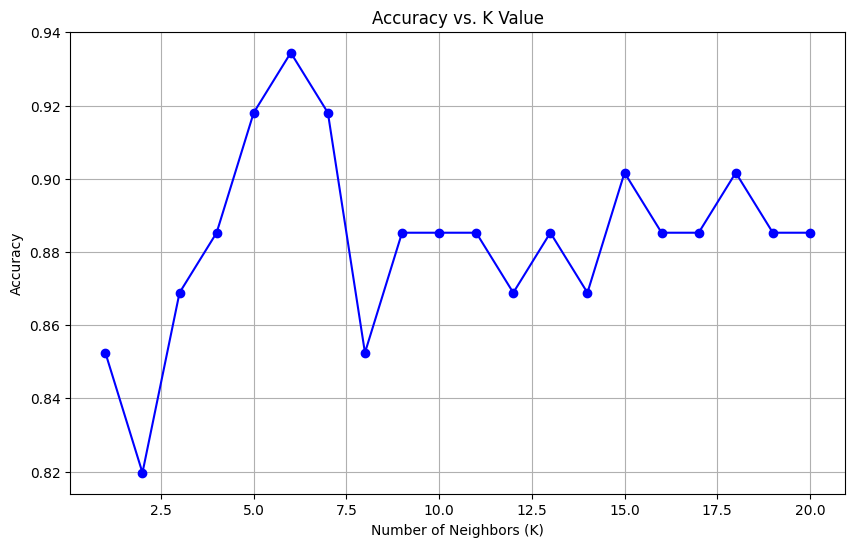

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
heart = pd.read_csv('heart.csv')  # Make sure you uploaded 'heart.csv' to Colab

# Features and target
X = heart.drop('target', axis=1)
y = heart['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best k
accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', color='blue')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Best K: 6 with accuracy: 0.9344

Accuracy Score: 0.9344262295081968

Confusion Matrix:
 [[28  1]
 [ 3 29]]


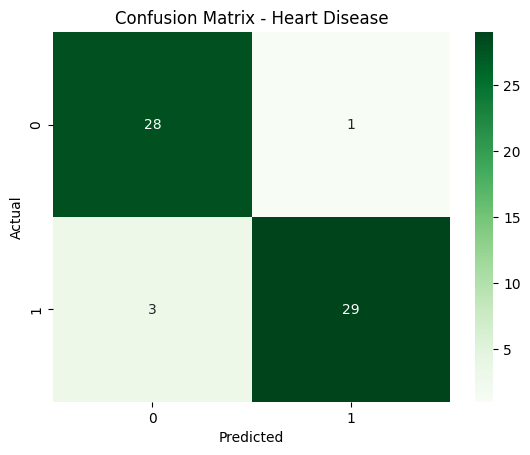

In [ ]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Best K: {best_k} with accuracy: {max(accuracy_scores):.4f}")

# Train final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Accuracy
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
print("\nConfusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Heart Disease')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report:
               precision    recall  f1-score   support

  No Disease       0.90      0.97      0.93        29
     Disease       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



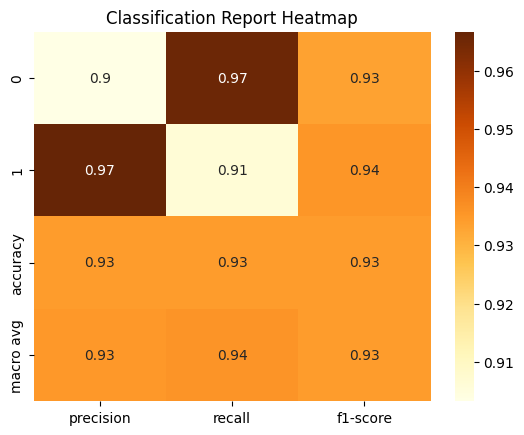

In [ ]:
report = classification_report(y_test, y_pred_final, target_names=["No Disease", "Disease"])
print("\nClassification Report:\n", report)

# Optional: Show classification report as heatmap
report_data = classification_report(y_test, y_pred_final, output_dict=True)
df_report = pd.DataFrame(report_data).transpose()
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlOrBr")
plt.title("Classification Report Heatmap")
plt.show()